In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [5]:
from flask import Flask, jsonify

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
#print(Base.classes)
print(Base.classes.keys())

['measurement', 'station']


In [9]:
# Save references to each table as a form of shorthand
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

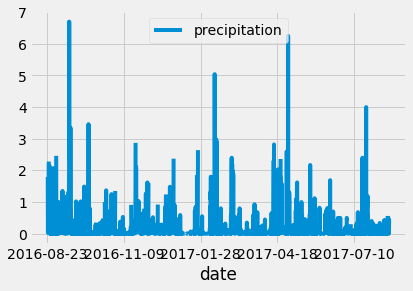

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
##print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
##print(df)
##print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
#print(df)
####replace this after     print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
##dir(Measurement)

results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [17]:

results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


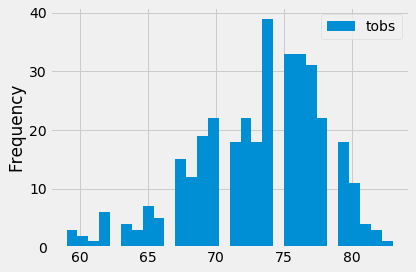

In [18]:
df.plot.hist(bins=30)
plt.tight_layout()

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
##col = [column, key for column in Measurement.__table__.columns]
# Set up Flask
app = Flask(__name__)

# Set up Routes
@app.route("/")

# Add routing info for each of the other routes
def welcome():
    return(
    '''
    Welcome to the Climate Analysis API!
    Available Routes:
    /api/v1.0/precipitation
    /api/v1.0/stations
    /api/v1.0/tobs
    /api/v1.0/temp/start/end
    ''')

# Add Precipitation route
@app.route("/api/v1.0/precipitation")

# Add Precipitation function
def precipitation():
   prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
   precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
   precip = {date: prcp for date, prcp in precipitation}
   return jsonify(precip)

# Add Stations route
@app.route("/api/v1.0/stations")

# Add Stations function
def stations():
    results = session.query(Station.station).all()
    stations = list(np.ravel(results))
    return jsonify(stations)

# Add Monthly Temperature route
@app.route("/api/v1.0/tobs")

# Add Monthly Temp function
def temp_monthly():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
    temps = list(np.ravel(results))
    return jsonify(temps)

# Add Stats route
@app.route("/api/v1.0/temp/<start>")
@app.route("/api/v1.0/temp/<start>/<end>")

# Add Stats function
def stats(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        results = session.query(*sel).filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        #return jsonify(temps)
        return temps

    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    #return jsonify(temps)
    return temps

stats("2015-06-01","2015-06-30")

[66.0, 74.99014778325123, 81.0]

# Challenge

       date  precipitation (inches)
 2010-06-01                    0.00
 2010-06-01                    0.01
 2010-06-01                    0.00
 2010-06-01                     NaN
 2010-06-01                    0.03
 2010-06-01                    0.00
 2010-06-01                    0.00
 2010-06-01                    0.08
 2010-06-01                    0.03
 2010-06-02                    0.00
 2010-06-02                    0.03
 2010-06-02                    0.00
 2010-06-02                    0.00
 2010-06-02                    0.03
 2010-06-02                    0.00
 2010-06-02                    0.00
 2010-06-02                    0.00
 2010-06-02                    0.01
 2010-06-03                    0.00
 2010-06-03                    0.00
 2010-06-03                    0.10
 2010-06-03                    0.00
 2010-06-03                    0.14
 2010-06-03                    0.00
 2010-06-03                    0.00
 2010-06-03                    0.00
 2010-06-03                 

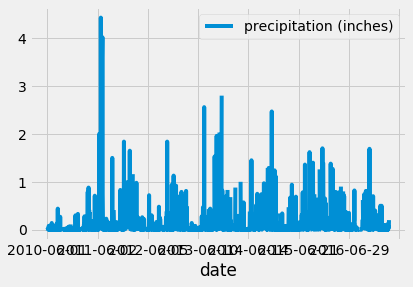

In [20]:
# Calculate the date one year from the last date in data set.
#prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results_pcpt_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
##print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(results_pcpt_june, columns=['date','precipitation (inches)'])
df1.set_index(df1['date'], inplace=True)
##print(df)
##print(df.to_string(index=False))
# Sort the dataframe by date
df1 = df1.sort_index()
#print(df)
print(df1.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df1.plot()

       date  temperature
 2010-06-01         78.0
 2010-06-02         76.0
 2010-06-03         78.0
 2010-06-04         76.0
 2010-06-05         77.0
 2010-06-06         78.0
 2010-06-07         77.0
 2010-06-08         78.0
 2010-06-09         78.0
 2010-06-10         79.0
 2010-06-11         78.0
 2010-06-12         78.0
 2010-06-13         78.0
 2010-06-14         77.0
 2010-06-15         78.0
 2010-06-16         78.0
 2010-06-17         77.0
 2010-06-18         77.0
 2010-06-19         82.0
 2010-06-20         78.0
 2010-06-21         78.0
 2010-06-22         78.0
 2010-06-23         78.0
 2010-06-24         78.0
 2010-06-25         77.0
 2010-06-26         76.0
 2010-06-27         78.0
 2010-06-28         78.0
 2010-06-29         78.0
 2010-06-30         78.0
 2011-06-01         77.0
 2011-06-02         78.0
 2011-06-03         73.0
 2011-06-04         70.0
 2011-06-05         76.0
 2011-06-06         77.0
 2011-06-07         77.0
 2011-06-08         77.0
 2011-06-09         77.0


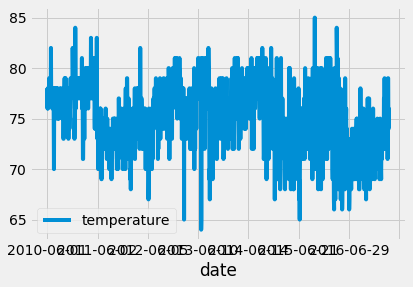

In [21]:
results_tobs_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
##print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(results_tobs_june, columns=['date','temperature'])
df2.set_index(df1['date'], inplace=True)
##print(df)
##print(df.to_string(index=False))
# Sort the dataframe by date
df2 = df2.sort_index()
#print(df)
print(df2.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df2.plot()

       date  precipitation (inches)
 2010-12-01                    0.04
 2010-12-01                    0.03
 2010-12-01                    0.70
 2010-12-01                    0.03
 2010-12-01                    1.35
 2010-12-01                    0.13
 2010-12-01                    1.48
 2010-12-01                    0.76
 2010-12-02                     NaN
 2010-12-02                    0.16
 2010-12-02                    0.06
 2010-12-02                    0.26
 2010-12-02                    0.00
 2010-12-02                    0.13
 2010-12-02                    0.02
 2010-12-02                    0.18
 2010-12-03                    1.59
 2010-12-03                    0.01
 2010-12-03                    0.78
 2010-12-03                    0.00
 2010-12-03                    0.22
 2010-12-03                    0.01
 2010-12-03                    0.47
 2010-12-03                    0.16
 2010-12-04                    0.00
 2010-12-04                    0.00
 2010-12-04                 

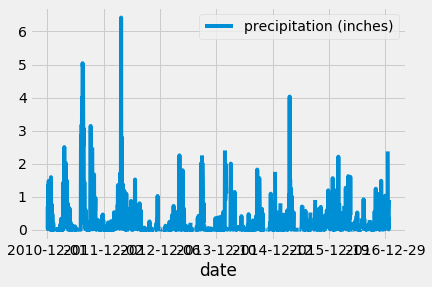

In [22]:
results_pcpt_dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
##print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df3 = pd.DataFrame(results_pcpt_dec, columns=['date','precipitation (inches)'])
df3.set_index(df3['date'], inplace=True)
##print(df)
##print(df.to_string(index=False))
# Sort the dataframe by date
df3 = df3.sort_index()
#print(df)
print(df3.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df3.plot()

       date  temperature
 2010-12-01         76.0
 2010-12-01         73.0
 2010-12-01         72.0
 2010-12-01         78.0
 2010-12-01         72.0
 2010-12-01         70.0
 2010-12-01         71.0
 2010-12-01         73.0
 2010-12-02         71.0
 2010-12-02         71.0
 2010-12-02         73.0
 2010-12-02         75.0
 2010-12-02         74.0
 2010-12-02         72.0
 2010-12-02         74.0
 2010-12-02         70.0
 2010-12-03         67.0
 2010-12-03         74.0
 2010-12-03         70.0
 2010-12-03         74.0
 2010-12-03         71.0
 2010-12-03         74.0
 2010-12-03         72.0
 2010-12-03         73.0
 2010-12-04         75.0
 2010-12-04         72.0
 2010-12-04         77.0
 2010-12-04         74.0
 2010-12-04         74.0
 2010-12-04         78.0
 2010-12-04         74.0
 2010-12-05         66.0
 2010-12-05         69.0
 2010-12-05         71.0
 2010-12-05         78.0
 2010-12-05         73.0
 2010-12-05         73.0
 2010-12-05         69.0
 2010-12-06         65.0


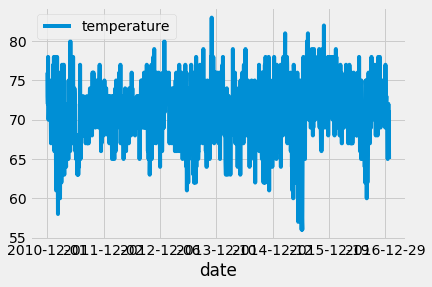

In [23]:
results_tobs_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
##print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df4 = pd.DataFrame(results_tobs_dec, columns=['date','temperature'])
df4.set_index(df4['date'], inplace=True)
##print(df)
##print(df.to_string(index=False))
# Sort the dataframe by date
df4 = df4.sort_index()
#print(df)
print(df4.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df4.plot()

In [24]:
df1.describe()
#June Rainfall Amounts

,precipitation (inches)
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [25]:
df2.describe()
# June Temperature Data

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [26]:
df3.describe()
# December Rainfall Amounts

,precipitation (inches)
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [27]:
df4.describe()
# December Temperature data the opposite.

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
